<font size=6>Task 1: Creating the Surrogate Model</font>

In [373]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import seaborn as sns

In [105]:
dataset=pd.read_csv("./Desktop/ds_opt/ds1.csv")

In [106]:
dataset['Res']=dataset['Width']*dataset['Height']
dataset

,Resolution,Width,Height,size(MB),time(Seconds),PPI,PPI(Normalized),Res
0,800x600,800,600,1.4400,16,192.30,0.000000,480000
1,1280x600,1280,600,2.3040,26,271.86,0.093898,768000
2,1024x768,1024,768,2.3593,26,246.15,0.063555,786432
3,1280x720,1280,720,2.7540,31,282.40,0.106338,921600
4,1152x864,1152,864,2.9860,34,276.90,0.099847,995328
5,1360x768,1360,768,3.1334,35,300.36,0.127535,1044480
6,1366x768,1366,768,3.1470,35,301.36,0.128715,1049088
7,1280x960,1280,960,3.6864,42,307.70,0.136197,1228800
8,1400x900,1400,900,3.7800,43,320.06,0.150785,1260000
9,1280x1024,1280,1024,3.9320,44,315.20,0.145049,1310720


In [107]:
train_data=dataset.sample(frac=0.6,random_state=0)
test_data=dataset.drop(train_data.index)

<font size=5>Sanity check that train and test set are unique</font>

In [108]:
print(test_data.merge(train_data).empty)

True


<font size=5>As we can see below, the time and quality are functions of Resolution</font>

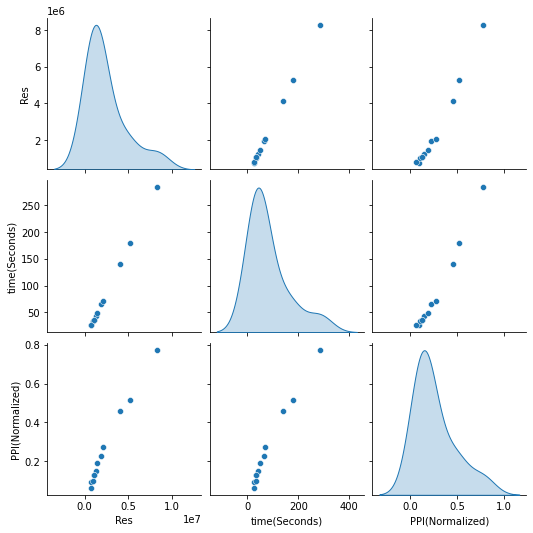

In [109]:
sns.pairplot(train_data[['Res','time(Seconds)','PPI(Normalized)']],diag_kind='kde')

<font size=5>Getting rid of useless features, because we are interested in the Width and Height only</font>

In [110]:
train_data.pop('PPI')
train_data.pop('size(MB)')
train_data.pop('Resolution')
train_data.pop('Res')
test_data.pop('PPI')
test_data.pop('size(MB)')
test_data.pop('Resolution')
test_data.pop('Res')

0      480000
3      921600
7     1228800
9     1310720
11    1470000
12    1764000
15    2408448
16    2583552
Name: Res, dtype: int64

<font size=5>Separate features from labels in both Training and Test set</font>

In [112]:
train_features=train_data.copy()
test_features=test_data.copy()
train_labels1=train_features.pop('time(Seconds)').tolist()
train_labels2=train_features.pop('PPI(Normalized)').tolist()
test_labels1=test_features.pop('time(Seconds)').tolist()
test_labels2=test_features.pop('PPI(Normalized)').tolist()

train_labels=np.concatenate((np.array(train_labels1).reshape((len(train_features),1)),np.array(train_labels2).reshape(len(train_features),1)),axis=1)
test_labels=np.concatenate((np.array(test_labels1).reshape((len(test_features),1)),np.array(test_labels2).reshape(len(test_features),1)),axis=1)

<font size=5>Creating the model</font>

In [359]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [368]:
model=keras.Sequential([
    normalizer,
    Dense(256,activation='relu'),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(2)
])
model.compile(optimizer='adam',loss='mse')

In [369]:
hist_train=model.fit(train_features,train_labels,validation_split=0.2,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 112ms/step - loss: 7989.8091 - val_loss: 1154.2131
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 7959.7168 - val_loss: 1150.7345
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 7930.7690 - val_loss: 1146.3123
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 7896.0503 - val_loss: 1140.7347
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 7853.1934 - val_loss: 1133.6805
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 7800.2690 - val_loss: 1124.6212
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 7734.1465 - val_loss: 1113.1198
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 7651.5747 - val_loss: 1098.6460
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 7547.9238 - val_loss: 1080.6179
Epoch 10/1000
1/1 [==============================] - 0

In [374]:
hist_acc=model.evaluate(test_features,test_labels)

1/1 [==============================] - 0s 1ms/step - loss: 3.8688


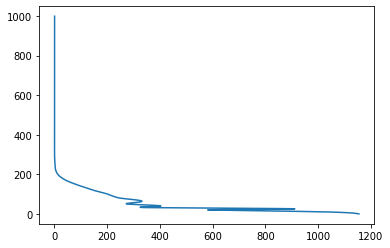

In [375]:
plt.plot(hist_train.history['val_loss'],range(len(hist_train.history['val_loss'])))